In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re 

#Fonction pour trouver les codes correspondants à un pays entre les codes de pays et le nom des pays :"
def equiv (x):
    return(df1[df1['Country Name'] == x]['Country Code'][0])


#fonction pour trouver toutes les lignes qui correspondent à un pays où à une variable en particulier

def recherche_ligne (x,y,df) :
    if x == 'Pays' :
        expression = re.compile(y+".*?;")
        return(list(i[:-1] for i in (expression.findall(';'.join(df.index))))) 
    else :
        expression = re.compile(".{,4}"+y+";")
        return(expression.findall(';'.join(df.index)))

#
#Si l'utilisateur cherche des lignes en fonction de pays il faut le mettre dans x
#
#sinon on recherche d'autres caractéristiques (/!\ il faut entre le nom avec des caractères regex pour les ( et %)
#
#/!\ Attention /!\ : avec cette fonction on renvoit listes de chaines de caractères qui correspondent aux noms des
#colonnes + le séparateur qu'on a utilisé ";" il faut donc le supprimer en ne prenant pas le dernier caractères des
#chaines [:,-1]



        

# On va télécharger les bases de données et repérer les variables pertinentes dans chacune des bases

### On commmence par créer les dataframe

Il faut légèrement modifier le fichier csv dézippé pour enlever les deux premières lignes, qui ne comprennent que des infos générales sur le format du fichier mais qui entrainaient un problème d'ouverture via la commande pd.read_csv car elles comportaient des virgules.

On peut ensuite ouvrir sereinement toutes les base modifiées ainsi.

In [2]:
agri_forest = pd.read_csv("chiffre_agri_foret_peche.csv")
augment_pib = pd.read_csv("chiffre_augment_pib.csv")
energie_utilisee = pd.read_csv("chiffre_energie_utilise.csv")
emission_GES = pd.read_csv("chiffre_GES_total.csv")
nucle_total = pd.read_csv('chiffre_nucle_total_nuke_total_fossile.csv')
part_indus_construc = pd.read_csv('chiffre_part_indus_construc.csv')
pib = pd.read_csv("chiffre_pib.csv")
nom_pays = pib['Country Name']

In [3]:
df_list  = [agri_forest, augment_pib, energie_utilisee, emission_GES, nucle_total, part_indus_construc, pib]

### On regarde chaque dataframe pour identifier les variables pertinentes

In [4]:
agri_forest.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
augment_pib.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.3,5.700001,2.1,1.999999,NaN,NaN,NaN,NaN


In [6]:
energie_utilisee.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
emission_GES.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Émissions totales de GES (kt d’équivalent CO2),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nucle_total.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
part_indus_construc.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Industry (including construction), value added...",NV.IND.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pib.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN


On observe que tous les df sont construits de la même manière. On a le nom du pays, son abréviation, le nom de l'indicateur utilisé, son code, puis sa valeur pour chaque année. On a aussi toujours une colonne vide, qui ne nous gène pas vraiment.

### On nettoie les bases en enlevant les informations qui ne nous intéresse pas

Il faudra enlever la colomne "unnamed", les colomnes qui correpondent aux années qui ne nous intéresssent pas, et éventuellement les lignes (=pays ou région) que l'on ne garde pas.

Par exemple, conserve-t-on les pays comme Aruba dont on ne connait que le PIB? Je pense que la question elle est vite répondue.

Pareil, est-ce que ça a vraiement un intérêt de garder les zones géographiques du type Asie du Sud-Est, etc?  ce ne sont que des aggrégats de pays, donc pas forcément.

### On fusionne les dataframe pour aggréger tous ces indicateurs

On peut envisager plusieurs manières de fusionner ces df. Soit on a en index Pays_Année et les colomnes correspindent chacune à un indice, soit on a Pays_Indicateur et les colonnes correspondent chacune a une année. Ce sont les formats wide et long (cf tp2).

Pour des raisons de lisibilité, il est évident que l'on va conserver le nom de l'indicateur, et non pas son nom de code. En revanche, il faudra voir à l'usage si on préfère utiler le nom complet des pays ou seulement leur nom de code

In [11]:
#On a ici la syntaxe qui permet de créer une nouvelle colomne en lui domnant le nom que l'on souhaite
pib['Pays_indic'] = pib['Country Code'].str[:3] + '_pib'

In [12]:
#On fait ici la modif sur tous les df à l'aide d'une boucle for, 
#mais ça peut donner des noms de variable un peu long à manipuler
for df in df_list :
    df['Pays_indic'] = df['Country Code'].str[:3] + '_' + df['Indicator Name'].str[:99]
#part_indus_construc['Pays_indic']

On concatène les df, on les trie et on met en index la variable créée à cet effet ci-dessus.

In [13]:
df = pd.concat(df_list)
df = df.sort_values('Pays_indic').set_index('Pays_indic')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Pays_indic,,,,,,,,,,,,,,,,,,,,,
"ABW_Agriculture, forestry, and fishing, value added (% of GDP)",Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_Alternative and nuclear energy (% of total energy use),Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_Energy use (kg of oil equivalent per capita),Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_GDP (current US$),Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
ABW_GDP growth (annual %),Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863e+00,4.198232e+00,3.000000e-01,5.700001e+00,2.100000e+00,1.999999e+00,NaN,NaN,NaN,NaN


### Suppression des colonnes et lignes inutiles

On a ici la liste des colonnes que l'on supprimme pour se restreindre aux données qui nous intéressent, sutrement dit à partir de 1980 (je ne sais plsu si on avait dit 1980 ou 1985).

In [14]:
useless_data_list = ['Unnamed: 65', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', 
                   '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '2020']
df = df.drop(useless_data_list, axis = 1)
#df.sample(15)

On va chercher à enlever les lignes qui ne contiennent que peu d'infos (au moins 10 valeurs manquantes)

In [15]:
df1 = df
nan_dict = {}
for i in range(len(df1.index)) :
    nb_nan = df1.iloc[i].isnull().sum()
    if nb_nan >10 :
        nan_dict[list(df.index)[i]] = nb_nan
nan_dict

{'ABW_Agriculture, forestry, and fishing, value added (% of GDP)': 25,
 'ABW_Alternative and nuclear energy (% of total energy use)': 40,
 'ABW_Energy use (kg of oil equivalent per capita)': 40,
 'ABW_Industry (including construction), value added (% of GDP)': 25,
 'ABW_Émissions totales de GES (kt d’équivalent CO2)': 32,
 'AFG_Agriculture, forestry, and fishing, value added (% of GDP)': 22,
 'AFG_Alternative and nuclear energy (% of total energy use)': 40,
 'AFG_Energy use (kg of oil equivalent per capita)': 40,
 'AFG_GDP (current US$)': 20,
 'AFG_GDP growth (annual %)': 23,
 'AFG_Industry (including construction), value added (% of GDP)': 22,
 'AGO_Agriculture, forestry, and fishing, value added (% of GDP)': 16,
 'AGO_Industry (including construction), value added (% of GDP)': 16,
 'ALB_Agriculture, forestry, and fishing, value added (% of GDP)': 16,
 'ALB_Industry (including construction), value added (% of GDP)': 16,
 'AND_Agriculture, forestry, and fishing, value added (% of GDP)'

In [16]:
df1 = df1.drop(index = nan_dict.keys(), axis = 0)
df1.shape

(1259, 43)

En faisant cela, on supprme environ 600 lignes. Pour le rafiner, il faudrait voir si l'on ne doit pas supprimer toutes les données d'un pays lorsque l'on a que des infos sur deux ou trois indicateurs (notamment qi que sur le PIB). On doit pouvoir s'en sortir en supprimant tous les indexs qui commencent par le code du pays détecté de cette manière.

[Adrien]La fonction pour récupérer les indexs des pays où on a moins de 3 indicateurs.

In [17]:
liste_pays_dic ={}

In [18]:
for i in nom_pays : 
    compter_nb_indic = df1.apply(lambda x: True if x['Country Name'] == i else False, axis = 1)
    if len(compter_nb_indic[compter_nb_indic == True].index) <3 :
        liste_pays_dic[i] = compter_nb_indic[compter_nb_indic == True].index

On supprime les lignes des pays dont on a trop peu d'indicateurs complet :

In [19]:
for i in liste_pays_dic.keys():
    df1 = df1.drop(index = liste_pays_dic[i], axis = 1)

In [20]:
df1.shape

(1201, 43)

On a supprimer en tout 58 lignes. De plus on va aussi supprimer de la base les aggrégats de pays (ces lignes là sont colinéaires aux autres, ce qui risque de nous poser problème plus tard dans la prédiction). Voilà les régions à supprimer : Upper middle income, Latin America & the Caribbean (IDA & IBRD countries),Middle East & North Africa (IDA & IBRD countries),South Asia (IDA & IBRD), Middle East & North Africa (IDA & IBRD countries), Latin America & the Caribbean (IDA & IBRD countries),East Asia & Pacific (IDA & IBRD countries), Europe & Central Asia (IDA & IBRD countries), Sub-Saharan Africa, Sub-Saharan Africa (excluding high income), Post-demographic dividend, Pre-demographic dividend, OECD members, North America, Middle East & North Africa (excluding high income), Middle East & North Africa,Late-demographic dividend, Lower middle income
Low & middle income,Latin America & Caribbean,Least developed countries: UN classification, Latin America & Caribbean (excluding high income),IBRD only,IDA & IBRD total,IDA total,IDA blend,Heavily indebted poor countries (HIPC),High income, European Union, Fragile and conflict affected situations,East Asia & Pacific (excluding high income)
Early-demographic dividend, East Asia & Pacific, Europe & Central Asia (excluding high income), Europe & Central Asia,Central Europe and the Baltics


à propos des aggrégats (comment ils aggrègent :)

Aggregation Rules

Aggregates are based on the World Bank’s regional and income classification of economies. Because of missing data, aggregates for groups of economies should be treated as approximations of unknown totals or average values. Regional and income group aggregates are based on the largest available set of data. The aggregation rules are intended to yield estimates for a consistent set of economies from one period to the next and for all indicators. Small differences between sums of subgroup aggregates and overall totals and averages may occur because of the approximations used. In addition, compilation errors and data reporting practices may cause discrepancies in theoretically identical aggregates such as world exports and world imports.

Five methods of aggregation are used in the World Development Indicators:

For group and world totals denoted in the tables by a t, missing data are imputed based on the relationship of the sum of available data to the total in the year of the previous estimate. The imputation process works forward and backward from 2010. Missing values in 2010 are imputed using one of several proxy variables for which complete data are available in that year. The imputed value is calculated so that it (or its proxy) bears the same relationship to the total of available data. Imputed values are usually not calculated if missing data account for more than a third of the total in the benchmark year. The variables used as proxies are GNI in U.S. dollars, total population, exports and imports of goods and services in U.S. dollars, and value added in agriculture, industry, manufacturing, and services in U.S. dollars.

Aggregates marked by an s are sums of available data. Missing values are not imputed. Sums are not computed if more than a third of the observations in the series or a proxy for the series are missing in a given year.

Aggregates of ratios are generally calculated as weighted averages of the ratios (indicated by w) using the value of the denominator or, in some cases, another indicator as a weight. The aggregate ratios are based on available data, including data for economies not shown in the main tables. Missing values are assumed to have the same average value as the available data. No aggregate is calculated if missing data account for more than a third of the value of weights in the benchmark year. In a few cases the aggregate ratio may be computed as the ratio of group totals after imputing values for missing data according to the above rules for computing totals.

Aggregate growth rates are generally calculated as a weighted average of growth rates (and indicated by a w). In a few cases growth rates may be computed from time series of group totals. Growth rates are not calculated if more than half the observations in a period are missing. For further discussion of methods of computing growth rates see below.

Aggregates denoted by an m are medians of the values shown in the table. No value is shown if more than half the observations for countries with a population of more than 1 million are missing. Exceptions to the rules occur throughout the book. Depending on the judgment of World Bank analysts, the aggregates may be based on as little as 50 percent of the available data.
In other cases, where missing or excluded values are judged to be small or irrelevant, aggregates are based only on the data shown in the tables.

Du coup en fonction de comment ils ont agrégés les données ça peut être intéressant ou non de les conserver. Notamment ceux pour lesquels ils ont utilisés la 1ère méthode puisqu'elle nous permet d'avoir une approximation des données qui nous manque (après est ce qu'on veut garder des approximations ? Dans tous les cas il faudra voir je pense si nos prédictions sont robustes à leur ajout ou non)

In [21]:
df2 = df1

In [22]:

liste_supression = ["Upper middle income", "Latin America & the Caribbean (IDA & IBRD countries)","Middle East & North Africa (IDA & IBRD countries)","South Asia (IDA & IBRD)","Middle East & North Africa (IDA & IBRD countries)", "Latin America & the Caribbean (IDA & IBRD countries)","East Asia & Pacific (IDA & IBRD countries)","Europe & Central Asia (IDA & IBRD countries)","Sub-Saharan Africa", "Sub-Saharan Africa (excluding high income)","Post-demographic dividend", "Pre-demographic dividend", "OECD members", "North America", "Middle East & North Africa (excluding high income)", "Middle East & North Africa","Late-demographic dividend", "Lower middle income","Low & middle income","Latin America & Caribbean","Least developed countries: UN classification", "Latin America & Caribbean (excluding high income)","IBRD only","IDA & IBRD total","IDA total","IDA blend","Heavily indebted poor countries (HIPC)","High income","European Union", "Fragile and conflict affected situations","East Asia & Pacific (excluding high income)","Early-demographic dividend","East Asia & Pacific","Europe & Central Asia (excluding high income)","Europe & Central Asia","Central Europe and the Baltics"]

for i in liste_supression :
    df2 = df2.drop(labels = recherche_ligne("Pays",equiv(i),df2), axis = 0)
df1 = df2

In [23]:
df1.shape

(988, 43)

On a supprimer encore en tout une centaine de ligne en supprimant l'ensemble des valeurs agrégées

# Début des statistiques descriptives :

On créé un vecteur temps pour pouvoir créer des graphiques en fonction du temps facilement.

In [24]:
t = np.linspace(1980,2019,40)

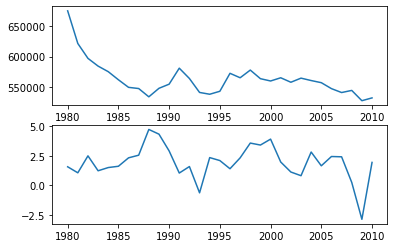

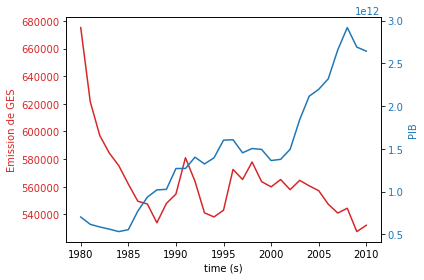

In [25]:
#Sur deux subplots différents
plt.subplot(211)
plt.plot(t[0:31],df1.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T)
plt.subplot(212)
plt.plot(t[0:31],df1.loc['FRA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T)

plt.show()

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('PIB', color=color)  
ax2.plot(t[0:31], df1.loc['FRA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

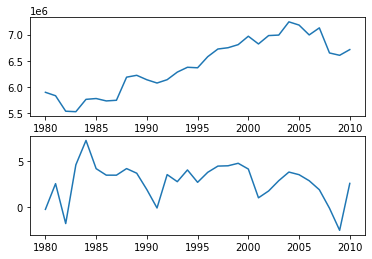

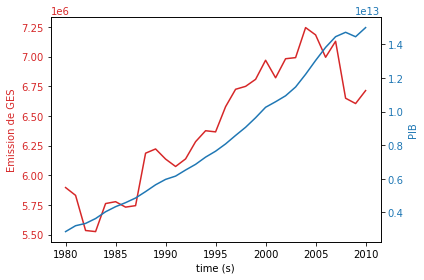

In [26]:
#Sur deux subplots différents
plt.subplot(211)
plt.plot(t[0:31],df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T)
plt.subplot(212)
plt.plot(t[0:31],df1.loc['USA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T)

plt.show()

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('PIB', color=color)  
ax2.plot(t[0:31], df1.loc['USA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


On va créer un nouvel indicateur qui va nous donner la croissance à l'année des gazs à effet de serre pour chaque pays :

In [27]:
for i in recherche_ligne('','Émissions totales de GES \(kt d’équivalent CO2\)',df1) :
    df1.loc[i[0:3]+'_croissance émissions GES (kt d’équivalent CO2)'] = df1.loc[i[:-1]][3:44].astype(np.float64).diff()

Maintenant qu'on à la croissance des émissions de gazs à effet de serre par an, on peut représenter la croissance du PIB et celle-ci sur le même graphe :

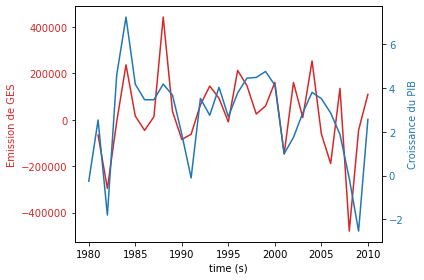

In [28]:
#Sur le même plot,

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_croissance émissions GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('Croissance du PIB', color=color)  
ax2.plot(t[0:31], df1.loc['USA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

On peut voir qu'il y a apparemment une certaine concommitance des courbes, cela-dit il faut faire attention aux effets d'échelles car ici le PIB ne passe presque jamais dans le négatif (ce qui est loin d'être le cas de la croissance des émissions de gaz à effet de serre). On va essayer de le faire dans le cas de la France pour se faire plus d'idées :

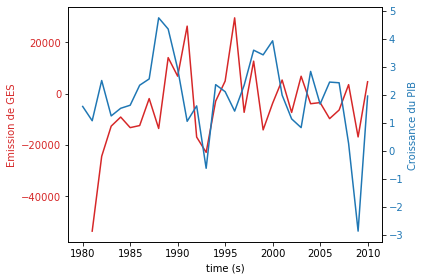

In [29]:
#Sur le même plot,

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['FRA_croissance émissions GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('Croissance du PIB', color=color)  
ax2.plot(t[0:31], df1.loc['FRA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Modèle pour effectuer une régression d'une variable sur une autre pour un pays

Idée : on pourrait essayer de faire du clustering afin de déterminer la dépendance de la croissance à certains facteurs afin d'essayer de prédire la dépendance de la croissance à l'émission de gaz à effet de serre.

Je vais essayer de régresser la croissance du PIB

In [30]:
recherche_ligne("Pays","FRA",df1)

['FRA_Agriculture, forestry, and fishing, value added (% of GDP)',
 'FRA_Alternative and nuclear energy (% of total energy use)',
 'FRA_Energy use (kg of oil equivalent per capita)',
 'FRA_GDP (current US$)',
 'FRA_GDP growth (annual %)',
 'FRA_Industry (including construction), value added (% of GDP)',
 'FRA_Émissions totales de GES (kt d’équivalent CO2)',
 'FRA_croissance émissions GES (kt d’équivalent CO2)']

In [31]:

test = df1.loc[['FRA_GDP (current US$)', 'FRA_Émissions totales de GES (kt d’équivalent CO2)']]
gdp = pd.DataFrame(test.loc['FRA_GDP (current US$)'][3:30])
ges = pd.DataFrame(test.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][3:30])
gdp = gdp['FRA_GDP (current US$)'].to_numpy(dtype = float)
ges = ges['FRA_Émissions totales de GES (kt d’équivalent CO2)'].to_numpy(dtype = float)


In [32]:
import scipy.optimize

def affin(x,a,b): 
    return a*x + b
popt, pcov = scipy.optimize.curve_fit(affin, ges, gdp)
coeff, cst = popt[0], popt[1]
print(popt)

[2.21821218e+06 1.00000000e+00]


C:\Users\JOSEPH\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


On va regarder si ça a du sens sur les USA, où l'on pourra vérifier la pertinence des coefficients obtenus à l'aide des graphiques ci-dessus

In [33]:
test = df1.loc[['USA_GDP (current US$)', 'USA_Émissions totales de GES (kt d’équivalent CO2)']]
gdp = pd.DataFrame(test.loc['USA_GDP (current US$)'][3:30])
ges = pd.DataFrame(test.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][3:30])
gdp = gdp['USA_GDP (current US$)'].to_numpy(dtype = float)
ges = ges['USA_Émissions totales de GES (kt d’équivalent CO2)'].to_numpy(dtype = float)

popt, pcov = scipy.optimize.curve_fit(affin, gdp, ges)
coeff, cst = popt[0], popt[1]
print(popt)

[1.58324271e-07 5.18468640e+06]


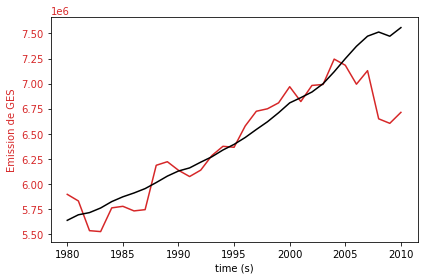

In [34]:
#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(t[0:31], coeff*df1.loc['USA_GDP (current US$)'][2:42].to_numpy()[1:32].T + cst, color='k')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


La bonne nouvelle, c'est que ça marche bien.
La mauvaise nouvelle, c'est que pour une raison inconnue si j'inverse ges et gdp dans la fonction, les résultats qu'il donne sont incohérents : il met que cst=1, autrement dit il se contente de faire une régression de la forme apib = ges. On a alors une approximation très mauvaise, qui ne prend en fait pas en compte la forme du modèle que l'on voulait imposer avec la définition de la fonction affin. Exemple ci-dessous.

C:\Users\JOSEPH\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.19523177e+06 1.00000000e+00]


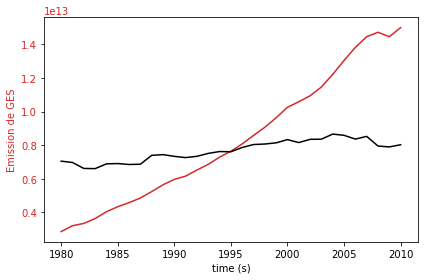

In [35]:
popt, pcov = scipy.optimize.curve_fit(affin, ges, gdp)
coeff, cst = popt[0], popt[1]
print(popt)

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(t[0:31], coeff*df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T + cst, color='k')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()